# Theoretical p-values and F1 scores

In [12]:
library(reshape2)
library(ggplot2)
library(RColorBrewer)
library(tidyr)


Attaching package: ‘tidyr’

The following object is masked from ‘package:reshape2’:

    smiths



## P-values

In [5]:
sizes = seq(5, 1000) # possible cluster sizes
termsizes = seq(1, 10000) # term sizes
N = 17105 # human GO genes together, without electronic annotations, gp version r1732_e89_eg36 

# Minimal possible p-value for different term sizes and cluster sizes
res = data.frame()
for(size in sizes){
    for(tsize in termsizes){
        # minimum comes if overlap==term size
        ol = min(size, tsize)
        # log p-values
        res[tsize, as.character(size)] = phyper(ol-1, tsize, N-tsize, size, lower.tail=F, log.p=T)
    }   
}

In [6]:
save(res, file="../data/pvals.Rdata")
#load(file="../data/pvals.Rdata")
logres = -res
clsizes = c("5", "10", "50", "100", "600", "900")
subres = logres[,clsizes]
subres$termsize = as.numeric(row.names(subres))

melted <- melt(subres, id.vars="termsize")

Saving 178 x 178 mm image


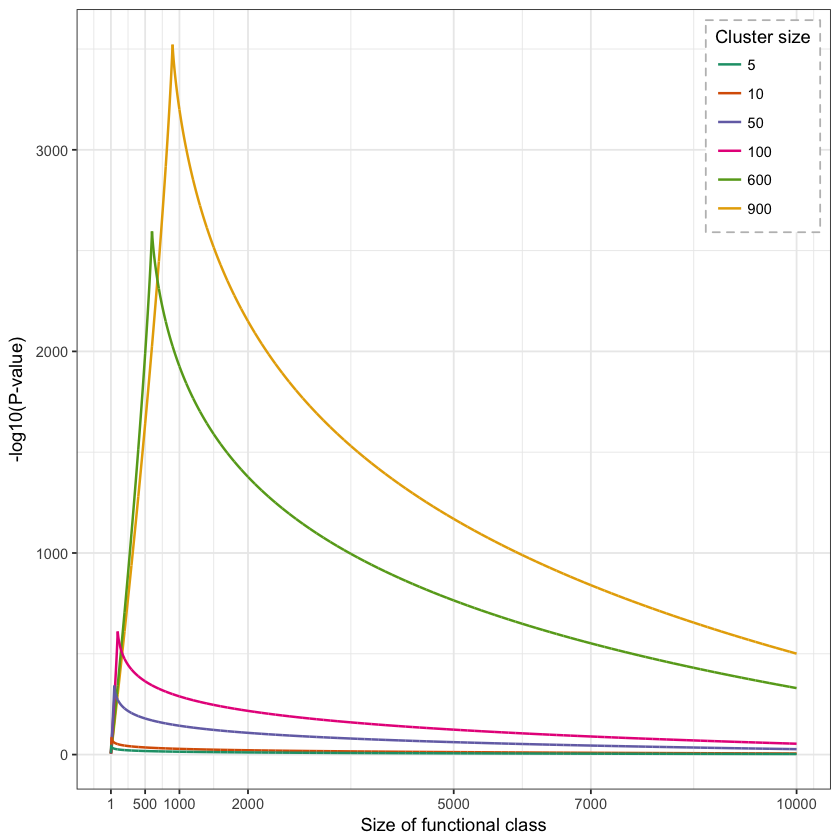

In [9]:
ggplot(melted, aes(x=termsize, y=value)) + geom_line(aes(color=variable, group=rev(variable)), size=0.7) + scale_color_manual(values=brewer.pal(6, "Dark2")) + theme_bw() + ylab("-log10(P-value)") + 
xlab("Size of functional class") + labs(color="Cluster size") + scale_x_continuous(breaks=c(1, 500, 1000, 2000, 5000, 7000, 10000)) + 
theme(legend.position=c(0.91,0.85), legend.background = element_rect(fill=rgb(1,1,1), size=0.5, color="grey", linetype=2)) 
ggsave("pval_limits_Fig4.pdf", dpi=600, units="mm", width=178)

## F1 scores

In [10]:
# F1 measure
sizes = seq(5, 1000) # possible cluster sizes
termsizes = seq(1, 10000) # term sizes
f1res = expand.grid(termsizes,sizes)
names(f1res) = c("termsize", "size")
f1res[["ol"]] = pmin( f1res[,1], f1res[,2])
f1res[["precision"]] = f1res$ol/f1res$size
f1res[["recall"]] = f1res$ol/f1res$termsize
f1res[["f1"]] = 2*(f1res$recall*f1res$precision)/(f1res$recall+f1res$precision)
head(f1res)

termsize,size,ol,precision,recall,f1
1,5,1,0.2,1.0000000,0.3333333
2,5,2,0.4,1.0000000,0.5714286
3,5,3,0.6,1.0000000,0.7500000
4,5,4,0.8,1.0000000,0.8888889
5,5,5,1.0,1.0000000,1.0000000
6,5,5,1.0,0.8333333,0.9090909


In [13]:
f1 = spread(f1res[,c("termsize", "size", "f1")], key = size, value = f1)
clsizes = c("5", "10", "50", "200", "500", "1000")
subres2 = f1[,clsizes]
subres2$termsize = as.numeric(row.names(subres2))

melted2 <- melt(subres2, id.vars="termsize")
head(melted2)

termsize,variable,value
1,5,0.3333333
2,5,0.5714286
3,5,0.7500000
4,5,0.8888889
5,5,1.0000000
6,5,0.9090909


Saving 178 x 178 mm image


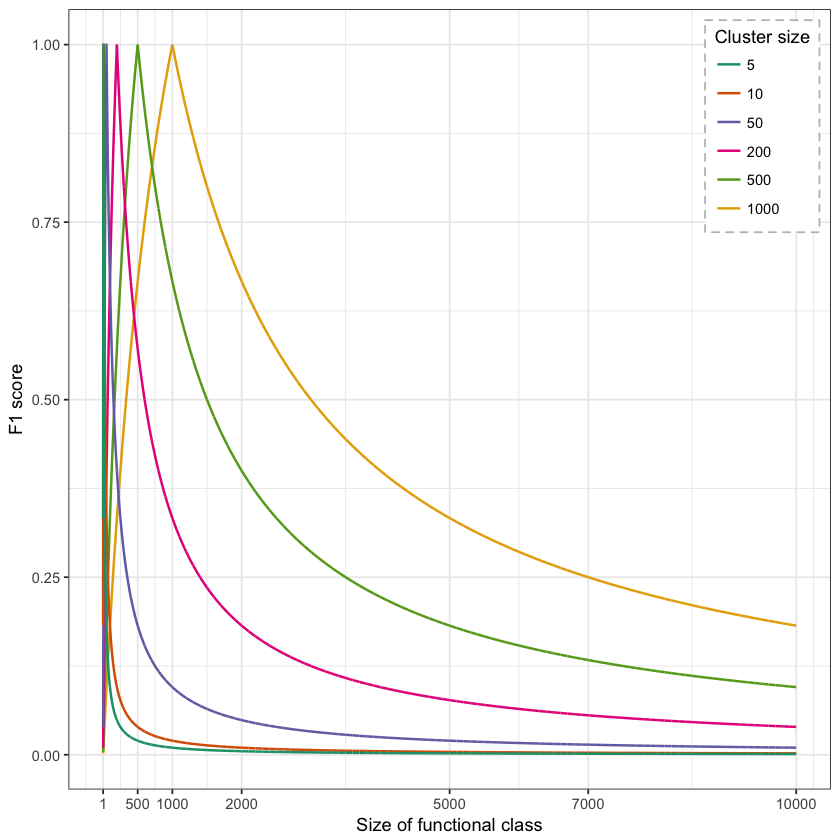

In [15]:
ggplot(melted2, aes(x=termsize, y=value)) + geom_line(aes(color=variable, group=rev(variable)), size=0.7) + 
scale_color_manual(values=brewer.pal(6, "Dark2")) + theme_bw() + ylab("F1 score") + 
xlab("Size of functional class") + labs(color="Cluster size") + scale_x_continuous(breaks=c(1, 500, 1000, 2000, 5000, 7000, 10000)) + 
theme(legend.position=c(0.91,0.85), legend.background = element_rect(fill=rgb(1,1,1), size=0.5, color="grey", linetype=2))

ggsave("F1_limits_Fig7.pdf", dpi=600, units="mm", width=178)